## Prepare dataset

In [ ]:
# Import all the libraries
import os
from os.path import join
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from zipfile import ZipFile
import numpy as np

In [ ]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#download set0
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY" -O set0.zip && rm -rf /tmp/cookies.txt

# decompressing the data
with ZipFile('set0.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

# removing the .zip file after extraction to clean space
!rm set0.zip

--2022-12-04 23:34:13--  https://docs.google.com/uc?export=download&confirm=t&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY
Resolving docs.google.com (docs.google.com)... 142.250.4.139, 142.250.4.113, 142.250.4.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.4.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/su7kl4i6et70asn6h38gqsrgacdnkhmm/1670196825000/11301297338463212034/*/1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY?e=download&uuid=107f3b17-9959-436c-8eef-4eb536c5d822 [following]
--2022-12-04 23:34:14--  https://doc-0o-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/su7kl4i6et70asn6h38gqsrgacdnkhmm/1670196825000/11301297338463212034/*/1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY?e=download&uuid=107f3b17-9959-436c-8eef-4eb536c5d822
Resolving doc-0o-3g-docs.googleusercontent.com (doc-0o-3g-docs.googleusercontent.com)... 74.125.200.132, 2404

In [ ]:
# decompressing every files
set_0_path = "Set0_Micro"
for p in os.listdir(set_0_path):
  with ZipFile(join(set_0_path, p),'r') as zip:
   zip.extractall(set_0_path)
   print(f'{p} decompressed successfully !')
   p = join(set_0_path, p)
   !rm $p

CRS_Micro.zip decompressed successfully !
PLK_Micro.zip decompressed successfully !
FLW_Micro.zip decompressed successfully !
RESISC_Micro.zip decompressed successfully !
BRD_Micro.zip decompressed successfully !
MD_MIX_Micro.zip decompressed successfully !
BCT_Micro.zip decompressed successfully !
PLT_VIL_Micro.zip decompressed successfully !
TEX_Micro.zip decompressed successfully !
SPT_Micro.zip decompressed successfully !


## Check the datasets

In [ ]:
#Path to dataset that contain folder images and labels.csv

df_TEX = pd.read_csv('./Set0_Micro/TEX_Micro/labels.csv')

texture_sb = df_TEX[df_TEX['CATEGORY'] == 'UIUC13_wall']
texture_hr = df_TEX[df_TEX['CATEGORY'] == 'KTH_corduroy']
texture_pv = df_TEX[df_TEX['CATEGORY'] == 'KTH_styrofoam']

join_df = [texture_sb, texture_hr, texture_pv]
df_TEX = pd.concat(join_df)

images_TEX = [cv2.imread(join('./Set0_Micro/TEX_Micro/images', filename)) for filename in df_TEX['FILE_NAME']]

labels_TEX = df_TEX['CATEGORY'].to_numpy() 
y = pd.get_dummies(labels_TEX)
#CV2 use RGB we want BGR
images_TEX = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2BGR) for img in images_TEX])

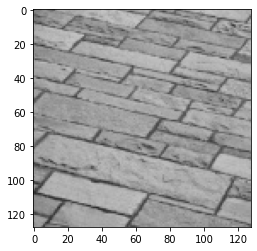

In [ ]:
plt.imshow(images_TEX[0])

## Style Transfer

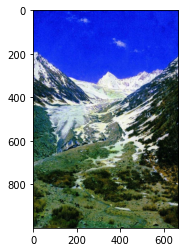

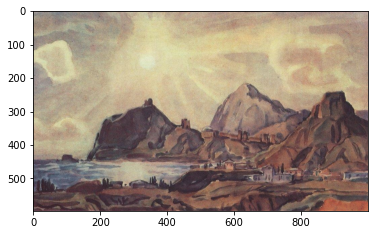

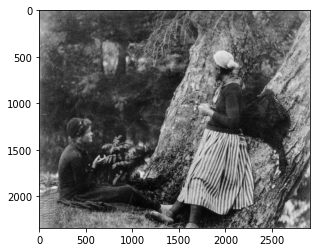

In [ ]:
# style Realism highest score and lowest score image


img1 = cv2.imread('./drive/MyDrive/Output/TransStyle/R0.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

img2 = cv2.imread('./drive/MyDrive/Output/TransStyle/R1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

img3 = cv2.imread('./drive/MyDrive/Output/TransStyle/R2.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

## Style Transfer

In [ ]:
%%capture

!git clone https://github.com/ProGamerGov/neural-style-pt

!mv neural-style-pt/* .

!rm -rf neural-style-pt

!python3 models/download_models.py

In [ ]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [ ]:
def transfer(img_path, style_path, output_path):
  !python3 neural_style.py \
  -content_image $img_path \
  -style_image $style_path \
  -style_weight 2500 -init image -tv_weight 0 -backend cudnn -print_iter 0 \
  -save_iter 0 -style_scale 2 -output_image $output_path 
  # -gpu c

In [ ]:
save_path = "./drive/MyDrive/Output/Output_texture" #Put a valid path here !
os.path.exists(save_path)

True

In [ ]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
style_name = ['R0.jpg','R1.jpg','R2.jpg']


for en in style_name:
  print(en)
  img = cv2.cvtColor(cv2.imread(join('./drive/MyDrive/Output/TransStyle',en)), cv2.COLOR_BGR2RGB)
  p1 = join('./drive/MyDrive/Output/TransStyle',en)


  
  for i in df_TEX['FILE_NAME']:
      print(i)
      img = cv2.cvtColor(cv2.imread(join('./Set0_Micro/TEX_Micro/images', i)), cv2.COLOR_BGR2RGB)
      path2 = join(save_path, "TEX_original")
      if not os.path.exists(path2):
        os.makedirs(path2)
      p2 = join(path2, str(i))
      cv2.imwrite(p2, img)

      path3 = join(save_path, "transformed"+ "_" +str(en))
      if not os.path.exists(path3):
        os.makedirs(path3)
      # output_path = join(path3, str(en) + "_" + style_key + ".jpg")
      output_path = join(path3, str(i) + "_" + en)
      if not os.path.exists(output_path):
        print("successfully")
        with HiddenPrints():
          transfer(p2, p1, output_path)



R0.jpg
0421f7e4-122c-4a56-80c6-0731133ec8fa.jpg
successfully
74e1739b-d14b-4147-a997-445d731458b2.jpg
successfully
a01797d5-b54b-4d6a-bcba-d932abbb1b1e.jpg
successfully
1bf494ac-babb-4f7e-a4a9-164c26d84470.jpg
successfully
265b4575-bd84-43a6-a585-83c0acaaaca8.jpg
successfully
dfdae11a-8a84-417f-8ffc-71a2ff96bcc5.jpg
successfully
8d7515f8-59ec-41ea-897e-3bc789da94dc.jpg
successfully
1b5aadc3-dd73-4972-b9de-4d269739cb8c.jpg
successfully
fbebd417-5c22-4791-aff5-22c6c584db67.jpg
successfully
8499b68c-1ec7-436c-9877-33db84497a82.jpg
successfully
a73396fe-094b-41dc-8896-ea0e2b9ab67c.jpg
successfully
1ae8f7fd-eba9-4d18-b5c1-3bddf7de783c.jpg
successfully
2ec8ad53-a245-4a21-985e-c0e1e493246d.jpg
successfully
9a0e28b3-dfc5-46d1-b55f-6519744934b6.jpg
successfully
ad234e2a-481e-4cec-94f0-26221ede1105.jpg
successfully
fbe24f0b-6eb1-4b39-a520-70ef43458f42.jpg
successfully
c2081bb9-d5ed-42f2-9804-f82dd1fbf800.jpg
successfully
f8330233-9ad3-46ca-b145-48d3db7cba43.jpg
successfully
035ccb83-1758-4b53-9e